In [1]:
from data_access.data_source import DataSource
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.datasets import load_iris
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
ds = DataSource()
primary_df = ds.get_primary_data_frame()
secondary_df = ds.get_secondary_data_frame()


clas
e    27181
p    33888
dtype: int64

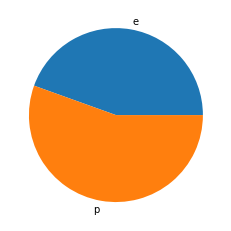

In [3]:
plt.pie(secondary_df.groupby("clas").size(), labels=("e", "p"))
secondary_df.groupby("clas").size()

In [4]:
primary_df.columns

Index(['family', 'name', 'clas', 'cap-diameter', 'cap-shape', 'cap-surface',
       'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing',
       'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface',
       'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type',
       'spore-print-color', 'habitat', 'season'],
      dtype='object')

In [5]:
secondary_df.columns


Index(['clas', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [6]:
secondary_df

,clas,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [7]:
secondary_df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


<AxesSubplot:>

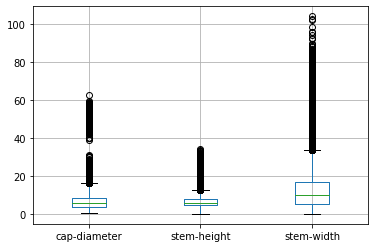

In [8]:
secondary_df[['cap-diameter', 'stem-height', 'stem-width']].boxplot()

<AxesSubplot:xlabel='cap-diameter', ylabel='Density'>

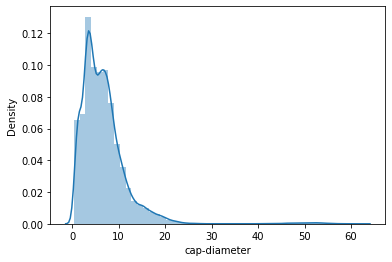

In [9]:
sns.distplot(secondary_df['cap-diameter'])

<AxesSubplot:xlabel='stem-width', ylabel='Density'>

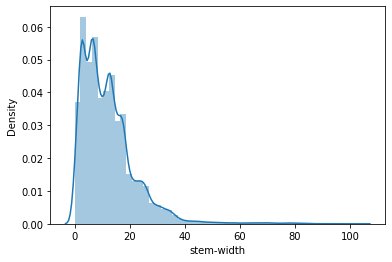

In [10]:
sns.distplot(secondary_df['stem-width'])

In [11]:
print('Skewness: {}'.format(secondary_df['cap-diameter'].skew()))
print('Kurtosis: {}'.format(secondary_df['cap-diameter'].kurt()))

Skewness: 3.8228439765098257
Kurtosis: 27.077466724882328


<AxesSubplot:xlabel='stem-height', ylabel='cap-diameter'>

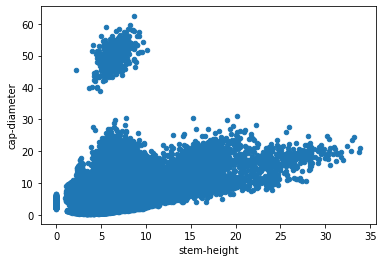

In [12]:
#scatterplot
diam= 'cap-diameter'
surf = 'stem-height'
data = pd.concat([secondary_df[diam], secondary_df[surf]], axis=1)
data.plot.scatter(y=diam,x=surf)


<AxesSubplot:xlabel='stem-width', ylabel='cap-diameter'>

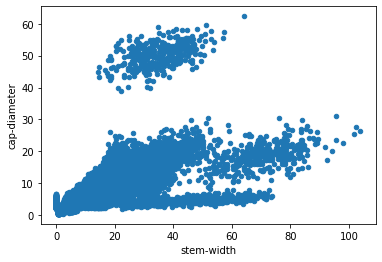

In [13]:
wid = "stem-width"
vector = pd.concat([secondary_df[diam], secondary_df[wid]], axis=1)
vector.plot.scatter(y=diam, x=wid)

(-0.5, 6.5, 0.0, 90.0)

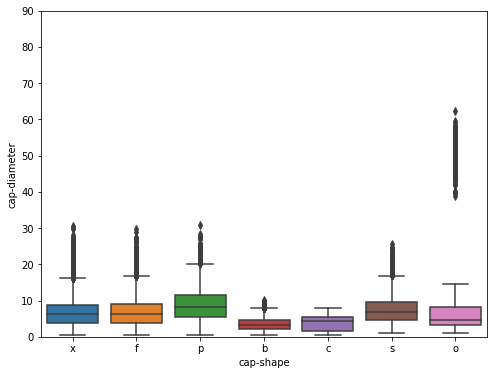

In [14]:
shp = 'cap-shape'
boxes = pd.concat([ds.get_secondary_data_frame()[diam], ds.get_secondary_data_frame()[shp]], axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(y=boxes[diam], x=boxes[shp])
fig.axis(ymin=0, ymax=90)



(-0.5, 11.5, 0.0, 70.0)

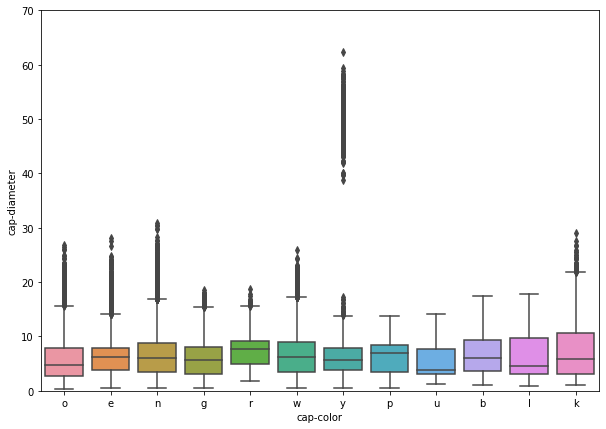

In [15]:
col = 'cap-color'
boxes = pd.concat([secondary_df[diam], secondary_df[col]], axis=1)
f, ax = plt.subplots(figsize=(10,7))
fig = sns.boxplot(y=boxes[diam], x=boxes[col])
fig.axis(ymin=0, ymax=70)


(-0.5, 1.5, 0.0, 80.0)

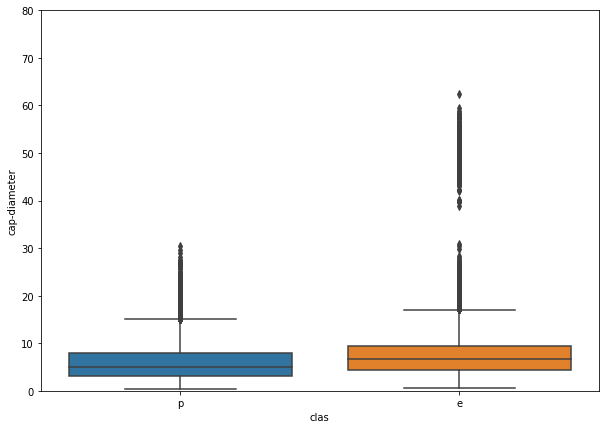

In [16]:
clas = "clas"
boxes = pd.concat([secondary_df[diam], secondary_df[clas]], axis=1)
f, ax = plt.subplots(figsize=(10,7))
fig = sns.boxplot(y=boxes[diam], x=boxes[clas])
fig.axis(ymin=0, ymax=80)

<AxesSubplot:>

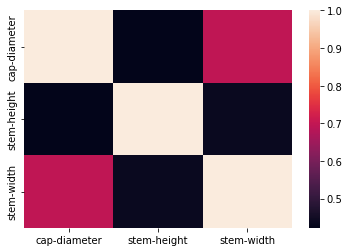

In [17]:
#heatmap
sns.heatmap(secondary_df.corr())

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'd'),
  Text(1, 0, 'm'),
  Text(2, 0, 'g'),
  Text(3, 0, 'h'),
  Text(4, 0, 'l'),
  Text(5, 0, 'p'),
  Text(6, 0, 'w'),
  Text(7, 0, 'u')])

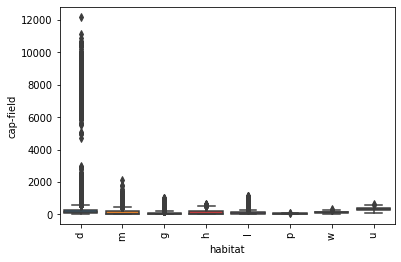

In [18]:
hb = 'habitat'
cp = np.multiply(np.power(np.array(secondary_df['cap-diameter']),2), np.pi)
bxs = pd.concat([secondary_df[hb], pd.DataFrame({"cap-field":cp})], axis=1)
fig = sns.boxplot(y=bxs['cap-field'], x=bxs[hb])
plt.xticks(rotation=90)

In [19]:
#looking for nulls
total = secondary_df.isnull().sum().sort_values(ascending=False)
percent=(secondary_df.isnull().sum()/secondary_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
veil-type,57892,0.947977
spore-print-color,54715,0.895954
veil-color,53656,0.878613
stem-root,51538,0.843931
stem-surface,38124,0.624277
gill-spacing,25063,0.410405
cap-surface,14120,0.231214
gill-attachment,9884,0.161850
ring-type,2471,0.040462
clas,0,0.000000


In [20]:
#funk = lambda x: ds.exchange_nones_to_false(secondary_df[x])
#without = list(map(funk, secondary_df.columns))
secondary_df['veil-type'].fillna(value='f',inplace=True)
secondary_df['veil-type']



0        u
1        u
2        u
3        u
4        u
        ..
61064    f
61065    f
61066    f
61067    f
61068    f
Name: veil-type, Length: 61069, dtype: object

In [21]:
#standard deviation
cap_diam_stand = StandardScaler().fit_transform(secondary_df[diam][:,np.newaxis])
low_range = cap_diam_stand[cap_diam_stand[:,0].argsort()][:10]
high_range = cap_diam_stand[cap_diam_stand[:,0].argsort()][-10:]
print('outer range of the distribution')
print(low_range)
print('outer range ot the distribution')
print(high_range)

outer range of the distribution
[[-1.20685539]
 [-1.19545895]
 [-1.19545895]
 [-1.18976073]
 [-1.18976073]
 [-1.18976073]
 [-1.18786133]
 [-1.18786133]
 [-1.18596192]
 [-1.18596192]]
outer range ot the distribution
[[ 9.6444552 ]
 [ 9.66344927]
 [ 9.69194037]
 [ 9.73372732]
 [ 9.75841961]
 [ 9.77741367]
 [ 9.79450833]
 [ 9.90657333]
 [10.01483951]
 [10.56186865]]


<AxesSubplot:xlabel='clas', ylabel='cap-diameter'>

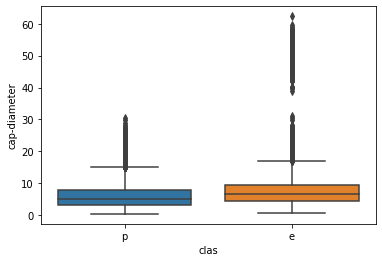

In [22]:
sns.boxplot(data=secondary_df,x='clas',y='cap-diameter') #!!!!!
#secondary_df[['cap-diameter', 'stem-height', 'stem-width','does-bruise-bleed']].boxplot()

<AxesSubplot:xlabel='clas', ylabel='stem-height'>

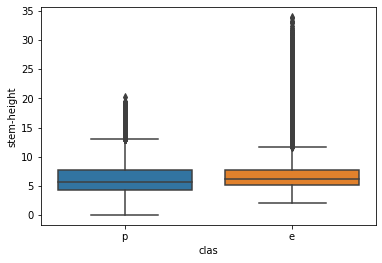

In [23]:
sns.boxplot(data=secondary_df,x='clas',y='stem-height')

<AxesSubplot:xlabel='clas', ylabel='stem-width'>

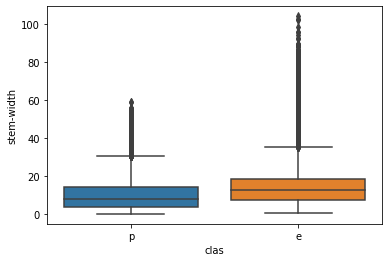

In [24]:
sns.boxplot(data=secondary_df,x='clas',y='stem-width')

<AxesSubplot:xlabel='cap-color', ylabel='count'>

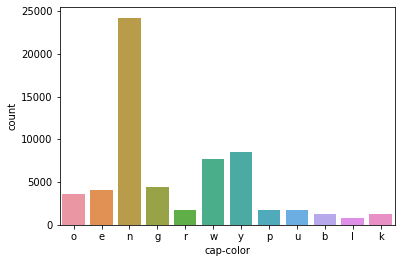

In [25]:
sns.countplot(data=secondary_df, x='cap-color')

<AxesSubplot:xlabel='clas', ylabel='cap-diameter'>

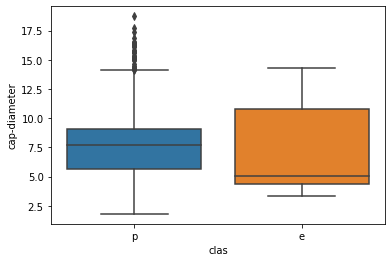

In [26]:
sns.boxplot(data=secondary_df[secondary_df['cap-color']=='r'],x='clas',y='cap-diameter')

In [27]:
tab = pd.crosstab(secondary_df['clas'], secondary_df['season'])
tab

season,a,s,u,w
clas,,,,
e,12785,1553,9647,3196
p,17392,1174,13251,2071


Text(0.5, 1.0, 'Percentage of dible mushrooms by seson')

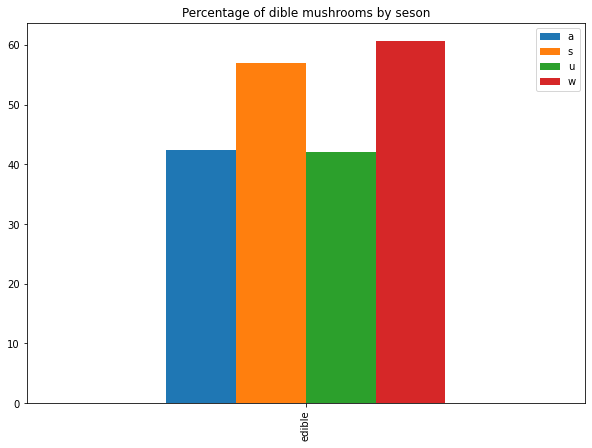

In [28]:
ds.edible_percent(secondary_df['clas'], secondary_df['season']).plot.bar(figsize=(10,7))
plt.title("Percentage of dible mushrooms by seson")

<AxesSubplot:xlabel='season', ylabel='count'>

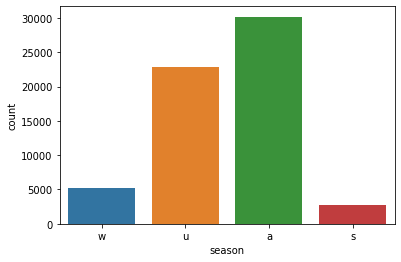

In [29]:
sns.countplot(secondary_df, x='season')

In [30]:
#checking percentages of edible shrooms in each season, this is correct with my hyphothesis
#that it is unlikely to aproach edible mushroom in winter; from all of winter mushrooms only 2.4 provent is edible
u = (tab['u']['e']*100)/np.sum(tab['u'])#summer
u

42.13031705825836

In [31]:
w = (tab['w']['e']*100)/np.sum(tab['w'])#winter
w

60.679703816214165

In [32]:
ds.edible_percent(index=secondary_df["clas"], columns=secondary_df['stem-root'])

,b,c,f,r,s
edible,66.666667,0.0,0.0,0.0,44.444444


In [33]:
s = (tab['s']['e']*100)/np.sum(tab['s'])#spring
s

56.94902823615695

In [34]:
a = (tab['a']['e']*100)/np.sum(tab['a'])#autumn
a

42.36670311826888

In [35]:
perc = lambda x: (hab[x]['e']*100)/np.sum(hab[x])
list(map(perc, hab.columns))

NameError: name 'hab' is not defined

In [36]:
pd.crosstab(secondary_df['clas'], secondary_df['habitat'])
#mushromms are most common in forests and in gresses. Highest percent of finding edible is also in forest group

habitat,d,g,h,l,m,p,u,w
clas,,,,,,,,
e,20163,2489,696,1938,1427,0,115,353
p,24046,5454,1305,1230,1493,360,0,0


Text(0.5, 1.0, 'Percentage of poisonous mushrooms by habitat')

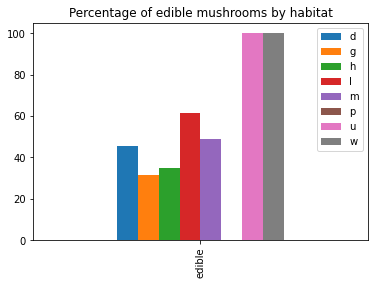

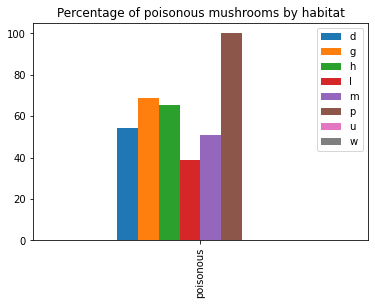

In [48]:
ds.edible_percent(secondary_df['clas'], secondary_df['habitat']).plot.bar()
plt.title("Percentage of edible mushrooms by habitat")
ds.edible_percent(secondary_df['clas'], secondary_df['habitat'], row="p").plot.bar()
plt.title("Percentage of poisonous mushrooms by habitat")

In [38]:
pd.crosstab(secondary_df['clas'], secondary_df['cap-color'])

cap-color,b,e,g,k,l,n,o,p,r,u,w,y
clas,,,,,,,,,,,,
e,974,880,2297,501,452,12407,1071,449,198,611,3750,3591
p,256,3155,2123,778,376,11811,2585,1254,1584,1098,3916,4952


In [39]:
cap_col = pd.crosstab(secondary_df['clas'], secondary_df['cap-color'])
cap_col

cap-color,b,e,g,k,l,n,o,p,r,u,w,y
clas,,,,,,,,,,,,
e,974,880,2297,501,452,12407,1071,449,198,611,3750,3591
p,256,3155,2123,778,376,11811,2585,1254,1584,1098,3916,4952


<AxesSubplot:>

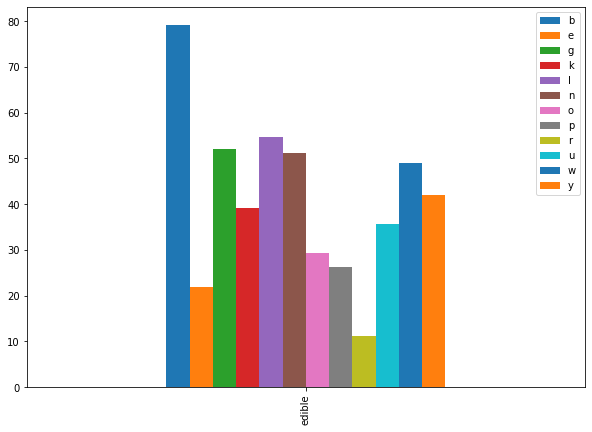

In [40]:
cap_perc = ds.edible_percent(secondary_df['clas'], secondary_df['cap-color'])
cap_perc.plot.bar(figsize=(10,7))

<AxesSubplot:xlabel='cap-color', ylabel='count'>

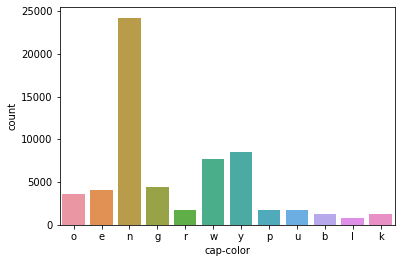

In [41]:
sns.countplot(secondary_df, x='cap-color')

<AxesSubplot:>

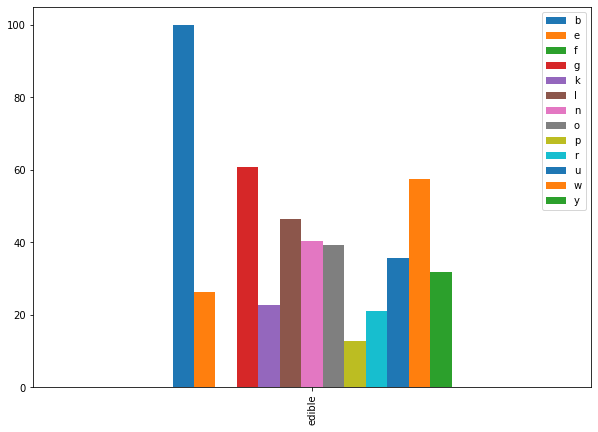

In [42]:
ds.edible_percent(secondary_df['clas'], secondary_df['stem-color'], row='e').plot.bar(figsize=(10,7))


<AxesSubplot:xlabel='stem-color', ylabel='count'>

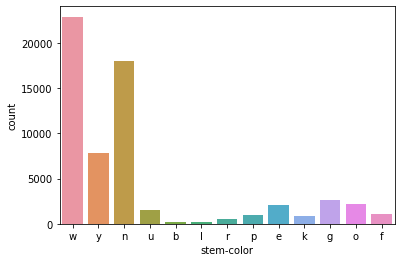

In [43]:
sns.countplot(secondary_df, x='stem-color')

In [44]:
pd.read_csv("../Main_program/Analiza.csv", delimiter="\t").drop(columns=["Unnamed: 0"])

,Accuracy,TN,TP,FN,FP,Estimator,sensitivity,specificity,PPV,NPV
0,63.263468,5326,2401,48,4439,Naive Bayas,0.980400,0.545417,0.351023,0.991068
1,99.869003,5367,6831,7,9,Decision Tree,0.998976,0.998326,0.998684,0.998697
2,100.000000,5374,6840,0,0,Random Forest,1.000000,1.000000,1.000000,1.000000
3,95.054855,5004,6606,370,234,SVM,0.946961,0.955326,0.965789,0.931150
4,99.983625,5374,6838,0,2,Neural Network,1.000000,0.999628,0.999708,1.000000


In [45]:
pd.read_csv("../Main_program/Analiza_cross_validacji.csv", delimiter="\t").drop(columns=["Unnamed: 0"])

,Accuracy,TN,TP,FN,FP,Estimator,sensitivity,specificity,PPV,NPV
0,99.905027,5431.8,6770.6,4.2,7.4,Decision_Tree,0.999380,0.998640,0.998908,0.999227
1,99.996725,5435.6,6778.0,0.4,0.0,Rand_forest,0.999941,1.000000,1.000000,0.999926
2,96.382839,5144.0,6628.2,292.0,149.8,SVM,0.957805,0.971703,0.977899,0.946284
